<br>
<span style="text-align: center">
 
# <span style="color:black; font-size:45px; font-family: Cambria">MultipathLocationEstimator tutorials </span>
 </span> <br>

<span style=" font-size:19px; font-family: Calibri">MultipathLocationEstimator is an open-source Python class for link-level simulations over 5G digital communication systems, which contains several estimation algorythms for **user equipment** (UE) positioning.
</span><br>

<span style=" font-size:19px; font-family: Calibri">The official documentation can be found [here](http://localhost:8888/view/py5g/MultipathLocationEstimator.html).</span><br></br></br>

<span style=" font-size:19px; font-family: Calibri">
To understand the use of this class, it has been created two jupyter notebooks that provides different examples of implementation of the system, from the simplest case to the hardest.
Futhermore, this work is structurated into two notebooks:
</span><br><br>


<span style=" font-size:23px; font-family: Calibri">**1.** [**First tutorial: Getting Started with  MultipathLocationEstimator**](#First-tutorial:-Getting-Started-with-MultipathLocationEstimator:) </span><br><br>

<span style=" font-size:20px; font-family: Calibri">2. [Second tutorial: MultipathLocationEstimator, estimation algorythms](https://github.com/gomezcuba/py5g/blob/dev-locator/Tutorial_2_MultipathLocationEstimator.ipynb) </span><br><br>

# <span style="color:black; font-size:32px; font-family: Cambria">First tutorial: Getting Started with  MultipathLocationEstimator </span>

<span style=" font-size:19px; font-family: Calibri">This first tutorial is focused in understanding the definition of the channel parameters between the **base station** (BS) and the UE. In other words, how it is established the coordinates and geometric system without going into detail in how the user position is computed.
</span><br>

## <span style=" font-size:28px; font-family: Cambria">Table of Contents: </span></br></br>

<span style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri;">1. [Problem statement](#1.-Problem-statement)</span><br><br>

<span style = "text-indent: 30px">
        
<span style=" font-size:20px; font-family: Calibri">2. [Examples](#2.-Examples)</span><br><br>

## <span style="color:black; font-size:33px; font-family: Calibri">1. Problem statement</span></br>

<span style=" font-size:19px; font-family: Calibri">The main goal of the MultipathLocationEstimator class is try to recover the UE position, define as (x0, y0), computing it trigonometrically from the knowledge of the set of the **Angles Of Departure** (AoD), **Angles Of Arrival** (AoA) and the **delays** introduced by the multipath channels. 
</span></br></br>

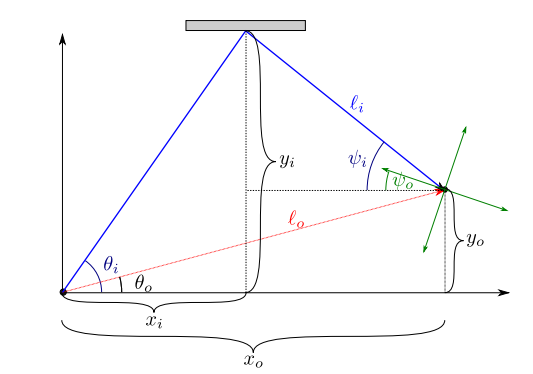

<span style=" font-size:19px; font-family: Calibri">The figure above shows a simple example of a teorical implementation of the problem. In this case the UE position is recovery with just using one scatter, that simulates one multipath channel in one of the two ray propagation paths. Moreover, the BS will be used as reference plane with coordinates [0,0].</span></br><br>
<span style=" font-size:19px; font-family: Calibri">In our reference system we are going to define two types of paths:</span><br><br>

<span style = "text-indent: 30px">
    
<div style = "background-color:#D0ECE7 ">

<br><span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">**1) LOS** path: line of sigth propagation path.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">**2) NLOS** path: non line of sigth propagation path which contains one scatter.</span><br><br>

<span style=" font-size:19px; font-family: Calibri">The constrains and terminology that will be used along the notebooks:</span></br></br>

<div style = "background-color:#D0ECE7 ">

<br>
<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* **theta_i**: angle of departure of the NLOS path.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **theta_0**: angle of departure of the LOS path.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **psi_i**: angle of arrival of the NLOS ray at the UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **psi_0**: offset angle of the user orientation.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **x_i**: coordinate x of a random scatter.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **y_i**: coordinate y of a random scatter.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **x_0**: coordinate x of a random UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **y_0**: coordinate y of a random UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **l_0**: LOS path lenth.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **l_i**: NLOS path length.</span><br><br>
    
<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **AoA**: angle of arrival of the NLOS path, mesured in the UE from de positive x-axis in the non-colckwise sense till the
</span>
    
<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">NLOS path. The value of psi_0 can modify the orientation of the x-axis.
.</span><br><br>
    
<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **AoD**: angle of departure of the NLOS path, mesured in the BS from de positive x-axis in the non-colckwise sense till the</span>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">NLOS path.</span><br><br>
    
<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* **tau_0**: delay measured in the LOS path signal propagation.</span><br><br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* **tau_i**: delay measured in the NLOS path signal propagation.</span><br><br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* **NLOS_delays**: set of the delays introduced by the NLOS path propagation as opposed to the LOS path propagation.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* **c**: ligth speed (3e8 m/s) </span><br><br>

<span style=" font-size:19px; font-family: Calibri">We compute the angles sets tetha_0, theta_i and phi_i as:</span><br><br>

<div style = "font-size:18px ">

<div style = "background-color:#D0ECE7 ">
<br>    
\begin{equation}
theta\_0 = arctan(\frac{y\_0}{x\_0})
\end{equation}

\begin{equation}
theta\_i = arctan(\frac{y\_i}{x\_i})
\end{equation}

\begin{equation}
phi\_i = arctan(\frac{y\_i-y\_0}{x\_0-x\_i})
\end{equation}
    
<br>

<span style=" font-size:19px; font-family: Calibri">And the path lengths and delays as:</span><br><br>

<div style = "font-size:18px ">

<div style = "background-color:#D0ECE7 "><br>    
\begin{equation}
l\_0 = (\frac{y\_0}{sin(theta\_0)})
\end{equation}

\begin{equation}
tau\_0 = (\frac{l\_0}{c})
\end{equation}

\begin{equation}
l\_i = (\frac{y\_i}{sin(theta\_i)}) + (\frac{y\_i-y\_0}{sin(psi\_i)})
\end{equation}
    
\begin{equation}
tau\_i = (\frac{l\_i}{c})
\end{equation}
    
\begin{equation}
NLOS\_delays = tau\_i-tau\_0
\end{equation}
    
<br>

### <span style="color:black; font-size:28px; font-family: Cambria">In this first tutorial you will learn how to: </span></br></br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* Generate positions for the users.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* Generate positions for the scatters.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* Computing the value of the theta and psi angles.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* Obtain the value of the AoA, AoD and delays parameters.</span><br><br>
    
<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* Geoometric system representation.</span><br><br>

## <span style="color:black; font-size:33px; font-family: Cambria">2. Examples</span></br></br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri;">A. [One multipath ray without random psi_0](#A.-One-multipath-ray-without-psi_0)</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">B. [One multipath ray with random psi_0](#B.-One-multipath-ray-with-random-psi_0)</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">C. [N multipath ray with random psi_0](#C.-N-multipath-rays-with-random-psi_0)</span><br><br>

### <span style="color:black; font-size:23px; font-family: Cambria"> Imports & Basics: </span></br>

In [174]:
#Import to use NumPy arrays
import numpy as np

#Import to create folders to save the images
import os

#Import for making plots 
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import rotate

from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (12, 11)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [175]:
#Create folders to save plots
Folder_dir = "Figures"
Folder_tutorial_1_dir = "tutorial_1"
Root_dir = os.path.dirname(os.path.abspath("Tutorial_1_MultipathLocationEstimator.ipyb"))

Folder_dir_path = os.path.join(Root_dir, Folder_dir)
Folder_tutorial_1_dir_path = os.path.join(Folder_dir_path, Folder_tutorial_1_dir)

#Check if the folders doesn't exist
if not os.path.exists(Folder_dir_path):
    os.makedirs(Folder_dir_path)  #### this command for creating directory

if not os.path.exists(Folder_tutorial_1_dir_path):
    os.makedirs(Folder_tutorial_1_dir_path)  #### this command for creating directory

## <span style="color:black; font-size:33px; font-family: Cambria">A. One multipath ray without psi_0</span></br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* One multipath channel.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* One scatter.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* One UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* No offset orientation (psi_0).</span><br><br>

In [180]:
# Number of Multipath paths, also the number of scattersscatter
Npath = 1

In [181]:
# We generate a random location for one user in a 100m [-50 y 50] square
x_0 = np.random.rand(1)*100 - 50
y_0 = np.random.rand(1)*100 - 50

print("x_0 = ",x_0[0])
print("y_0 = ",y_0[0])

x_0 =  22.068377824628016
y_0 =  44.436417567257664


In [182]:
# We generate Npath random locations for scatters in a 50m [-50 y 50] square
x_i = np.random.rand(Npath,1)*100 - 50
y_i = np.random.rand(Npath,1)*100 - 50

print("x_i = ",x_i[0][0])
print("y_i = ",y_i[0][0])

x_i =  -33.30625245671235
y_i =  35.776038823939246


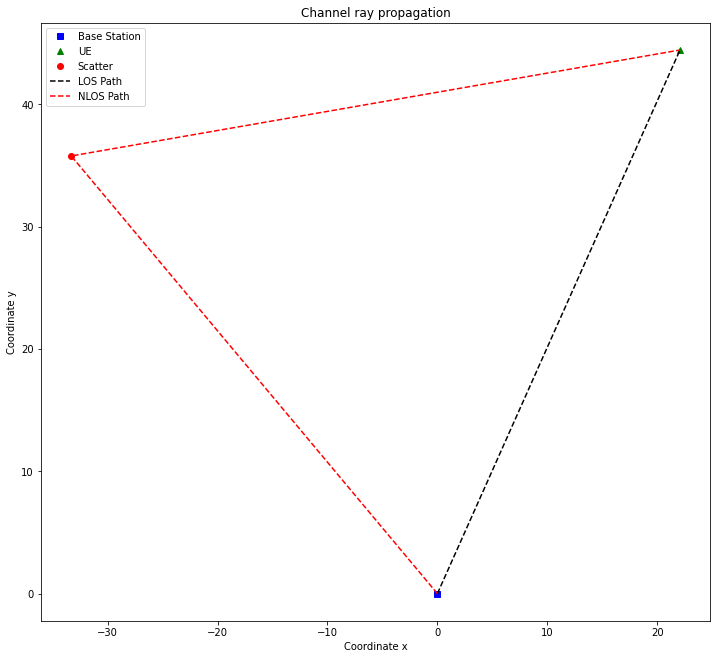

In [183]:
plt.figure(1)

# Plot the Base Station
plt.plot(0,0,'sb', label = "Base Station")

# Plot the user
plt.plot(x_0,y_0,'^g', label = "UE")

# Plot the scatter
plt.plot(x_i, y_i, 'or', label = "Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], '--k', label = "LOS Path")

# Plot NLOS path
plt.plot([0,x_i,x_0],[0,y_i,y_0],'--r', label = "NLOS Path")

plt.title("Channel ray propagation")
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')

# Make and plot legend
plt.legend()

# Save Figure_A_1 image
plt.savefig(Folder_tutorial_1_dir_path +'/Figure_A_1.png')

In [184]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

print("theta_0 = ",np.rad2deg(theta_0[0]), "º")
print("theta_i = ",np.rad2deg(theta_i[0][0]), "º")
print("psi_i = ",np.rad2deg(psi_i[0][0]), "º")

theta_0 =  63.589709357527205 º
theta_i =  132.95246960396443 º
psi_i =  351.1111670620636 º


In [185]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(np.pi - psi_i, 2*np.pi)

print("AoD = ",np.rad2deg(AoD[0][0]), "º")
print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoD =  132.95246960396443 º
AoA =  188.88883293793637 º


In [186]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0 / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

print("tau_0 = ",tau_0[0], "s")

tau_0 =  1.6538199908838052e-07 s


In [187]:
# NLOS path time delay
#l_i_1 = np.abs(y_i / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(y_i / np.sin(theta_i)) + np.abs((y_i - y_0) / np.sin(psi_i))
tau_i = l_i / c

print("tau_i = ",tau_i[0][0], "s")

tau_i =  3.497584290084267e-07 s


In [188]:
# Delay difference between LOS and NLOS paths
NLOS_delays = tau_i - tau_0

print("delays = ",NLOS_delays[0][0], "s")

delays =  1.8437642992004619e-07 s


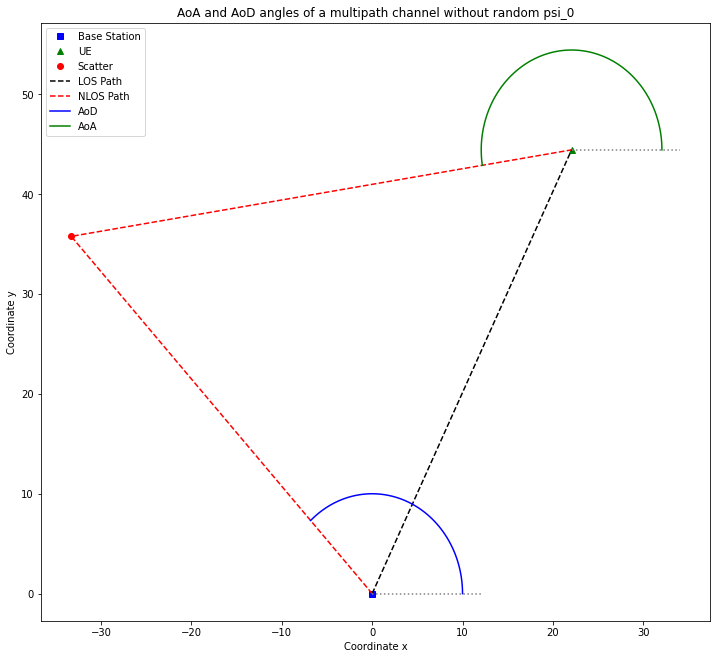

In [189]:
plt.figure(2)

# Plot the Base Station
plt.plot(0,0,'sb', label = "Base Station")

# Plot the user
plt.plot(x_0,y_0,'^g', label = "UE")

# Plot the scatter
plt.plot(x_i, y_i, 'or', label = "Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], '--k', label = "LOS Path")

# Plot NLOS path
plt.plot([0,x_i[0],x_0],[0,y_i[0],y_0],'--r', label = "NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_points = 100
circle_scale = 10
t = np.linspace(0,1,circle_points)

# Plot x axis reference line in the Base Station
plt.plot([0, circle_scale+2],[0,0],':',color='grey')

# Plot x axis reference line in the UE
plt.plot([x_0, x_0+circle_scale + Npath*2],[y_0,y_0],':',color='grey')

# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t),'b',label = "AoD")

# Plot AoA angle
plt.plot(x_0 + (circle_scale)*np.cos((AoA[0])*t), y_0 + (circle_scale)*np.sin((AoA[0])*t),'g',label = "AoA")
    
plt.title("AoA and AoD angles of a multipath channel without random psi_0")
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')

# Make and plot legend
plt.legend()

# Save Figure_A_2 image
plt.savefig(Folder_tutorial_1_dir_path +'/Figure_A_2.png')

## <span style="color:black; font-size:33px; font-family: Cambria">B. One multipath ray with random psi_0</span></br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* One multipath channel.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* One scatter.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* One UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri; color:red">* With offset orientation (psi_0).</span><br><br>

In [190]:
# We generate a random angle for user offset
psi_0 = np.random.rand(1)*2*np.pi

print("psi_0 = ",np.rad2deg(psi_0[0]), "º")

psi_0 =  63.99560797274653 º


In [191]:
AoA = np.mod(np.pi - psi_i + psi_0, 2*np.pi)

print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoA =  252.8844409106829 º


/tmp/ipykernel_15417/1866913930.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x_0, x_0+circle_scale+Npath],[y_0,y_0],':k',color='grey')


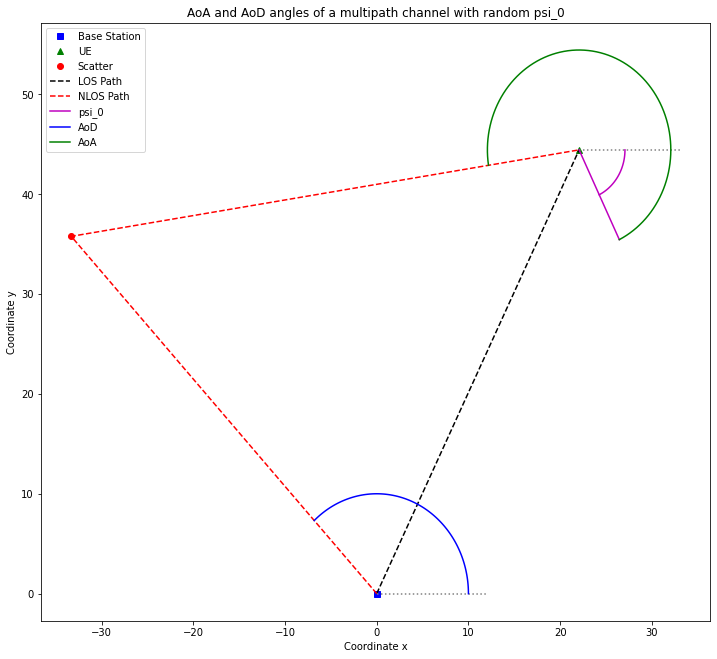

In [192]:
plt.figure(3)

# Plot the Base Station
plt.plot(0,0,'sb', label = "Base Station")

# Plot the user
plt.plot(x_0,y_0,'^g', label = "UE")

# Plot the scatter
plt.plot(x_i, y_i, 'or', label = "Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], '--k', label = "LOS Path")

# Plot NLOS path
plt.plot([0,x_i[0],x_0],[0,y_i[0],y_0],'--r', label = "NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0,1,circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2],[0,0],':',color='grey')
plt.plot([x_0, x_0+circle_scale+Npath],[y_0,y_0],':k',color='grey')

# Plot phi_0 reference line
plt.plot([x_0, x_0 + np.cos(-psi_0)*circle_scale],[y_0, y_0 + np.sin(-psi_0)*circle_scale],'m')

# Plot phi_0 angle
plt.plot(x_0 + (circle_scale/2)*np.cos((-psi_0)*t), y_0 + (circle_scale/2)*np.sin((-psi_0)*t),'m' ,label = "psi_0")

# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t),'b',label = "AoD")

# Plot AoA angle
x = np.array([(circle_scale)*np.cos(AoA[0]*t)])
y = np.array([(circle_scale)*np.sin(AoA[0]*t)])

rotated = np.concatenate((x, y), axis=0)

newX = rotated[0,:] * np.cos(-psi_0) - rotated[1,:] * np.sin(-psi_0)
newY = rotated[0,:] * np.sin(-psi_0) + rotated[1,:] * np.cos(-psi_0)

plt.plot(x_0 + newX, y_0 + newY,'g',label = "AoA")

plt.title("AoA and AoD angles of a multipath channel with random psi_0")
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')

# Make and plot legend
plt.legend()

# Save Figure_B image
plt.savefig(Folder_tutorial_1_dir_path +'/Figure_B.png')

## <span style="color:black; font-size:33px; font-family: Cambria">C. N multipath rays with random psi_0</span></br>

<span style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri; color:red">* N multipath channels.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri; color:red">* N scatters.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* One UE.</span><br><br>

<span style = "text-indent: 30px">
    
<span style=" font-size:19px; font-family: Calibri">* With offset orientation (psi_0).</span><br><br>

In [193]:
# Number of Multipath paths, also the number of scatters
Npath = 5

In [194]:
#We generate a random location for one user in a 100m [-50 y 50] square
x_0 = np.random.rand(1)*100 - 50
y_0 = np.random.rand(1)*100 - 50

In [195]:
#We generate Npath random locations for scatters in a 50m [-50 y 50] square
x_i = np.random.rand(Npath,1)*100 - 50
y_i = np.random.rand(Npath,1)*100 - 50

/tmp/ipykernel_15417/2468250501.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "sb" (-> color='b'). The keyword argument will take precedence.
  plt.plot(0,0,'sb', label = "Base Station", color = "blue")
/tmp/ipykernel_15417/2468250501.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_0,y_0,'^g', label = "UE", color = "green")
/tmp/ipykernel_15417/2468250501.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_i, y_i, 'or', label = "Scatter", color = "red")


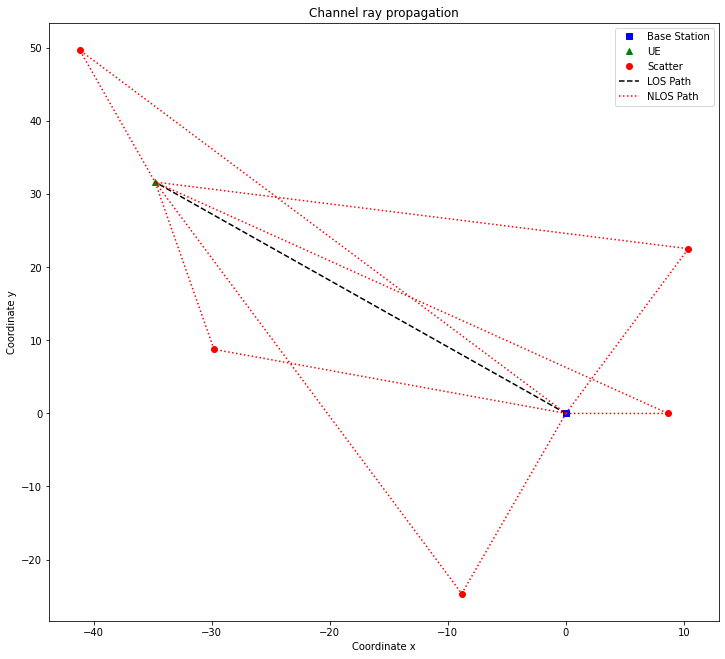

In [196]:
plt.figure(4)

# Plot the Base Station
plt.plot(0,0,'sb', label = "Base Station", color = "blue")

# Plot the user
plt.plot(x_0,y_0,'^g', label = "UE", color = "green")

# Plot the scatter
plt.plot(x_i, y_i, 'or', label = "Scatter", color = "red")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], '--k', label = "LOS Path")

# Plot NLOS path
for p in range(Npath):
    plt.plot([0,x_i[p],x_0],[0,y_i[p],y_0],':r', label = "NLOS Path")    

plt.title("Channel ray propagation")
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Save Figure_C_1 image
plt.savefig(Folder_tutorial_1_dir_path +'/Figure_C_1.png')

In [197]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

In [198]:
#We generate a random angle for user offset
psi_0 = np.random.rand(1)*2*np.pi

print("psi_0 = ",np.rad2deg(psi_0[0]), "º")

psi_0 =  292.62012659788775 º


In [199]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(np.pi - psi_i + psi_0, 2*np.pi)

In [200]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0 / np.sin(theta_0))

# LOS path time delay
tau_0 = l_0 / c

In [201]:
# NLOS path time delay
#l_i_1 = np.abs(y_i / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(y_i / np.sin(theta_i)) + np.abs((y_i - y_0) / np.sin(psi_i))
tau_i = l_i / c

In [202]:
# Delay difference between LOS and NLOS paths
NLOS_delays = tau_i - tau_0

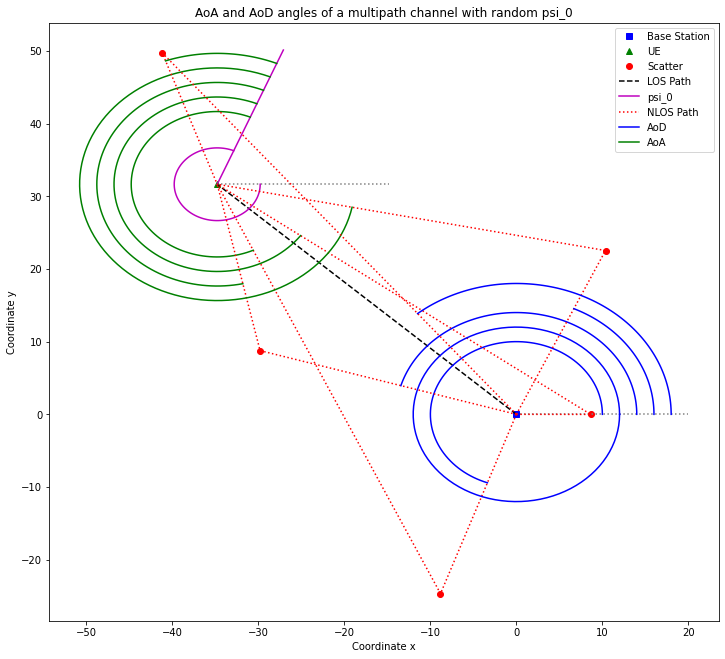

In [203]:
plt.figure(5)

# Plot the Base Station
plt.plot(0,0,'sb', label = "Base Station")

# Plot the user
plt.plot(x_0,y_0,'^g', label = "UE")

# Plot the scatter
plt.plot(x_i, y_i, 'or', label = "Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], '--k', label = "LOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0,1,circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2],[0,0],':',color='grey')
plt.plot([x_0, x_0+circle_scale+Npath*2],[y_0,y_0],':',color='grey')

# Plot psi_0 reference line
plt.plot([x_0, x_0 + np.cos(-psi_0)*(circle_scale+Npath*2)],[y_0, y_0 + np.sin(-psi_0)*(circle_scale+Npath*2)],'m')

# Plot psi_0 angle
plt.plot(x_0 + (Npath)*np.cos((-psi_0)*t), y_0 + (Npath)*np.sin((-psi_0)*t),'m' ,label = "psi_0")


for p in range(Npath):
    
    # Plot NLOS paths
    plt.plot([0,x_i[p],x_0],[0,y_i[p],y_0],':r', label = "NLOS Path")
    
    # Plot AoD angles
    plt.plot(0 + (circle_scale + p*2)*np.cos(AoD[p]*t), 0 + (circle_scale + p*2)*np.sin(AoD[p]*t),'b',label='AoD')
    
    # Plot AoA angles
    x = np.array([(circle_scale + p*2)*np.cos(AoA[p]*t)])
    y = np.array([(circle_scale + p*2)*np.sin(AoA[p]*t)])
    
    rotated = np.concatenate((x, y), axis=0)
    
    newX = rotated[0,:] * np.cos(-psi_0) - rotated[1,:] * np.sin(-psi_0)
    newY = rotated[0,:] * np.sin(-psi_0) + rotated[1,:] * np.cos(-psi_0)
    
    plt.plot(x_0 + newX, y_0 + newY,'g',label='AoA')

plt.title("AoA and AoD angles of a multipath channel with random psi_0")
plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Save Figure_C_2 image
plt.savefig(Folder_tutorial_1_dir_path +'/Figure_C_2.png')